### Question 1: Neural network with CIFAR-10 (40)

Load the CIFAR-10 dataset from the tensorflow toy data. Conduct any necessary pre-processing. Note: this is a really large data, you may need some time to load it. You may read here about the background: https://www.kaggle.com/c/cifar-10/overview

1. Fit a neural network for the cifar10 data and make an prediction with the test data. Report thr accuracy. The neural network should have 2 layers and each layer has 128 nodes. Set the epochs as 5 and batch size as 64. (20)

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
#normalize the pixel value
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

# Flatten the images to a 1D array
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

# one-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
model = Sequential([
    Flatten(input_shape = (32, 32, 3)),
    Dense(128, activation = 'relu'), 
    Dense(128, activation='relu'),
    Dense(10, activation = 'softmax')
])
opt = keras.optimizers.legacy.Adam(learning_rate = 0.01)
model.compile(optimizer = opt,
             loss = 'categorical_crossentropy', 
             metrics = 'accuracy')
model.fit(train_images, train_labels, epochs = 5, 
         batch_size = 64, validation_split = 0.2, verbose = -1)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [20]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

313/313 [==============================] - 0s 600us/step - loss: 2.0607 - accuracy: 0.1920
0.19200000166893005


2. Include the batch normalization, l2 regulization (with penalty parameter equals to 0.01) and dropout (with 0.5) in the neural network. Don't worry if your results become worse since we have not tune the parameters. (10)

In [25]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential([
    Flatten(input_shape = (32, 32, 3)),
    Dense(128, activation = 'relu'), 
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer = l2(0.01)),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])
opt = keras.optimizers.legacy.Adam(learning_rate = 0.01)
model.compile(optimizer = opt,loss = 'categorical_crossentropy', metrics = 'accuracy')
model.fit(train_images, train_labels, epochs = 5, batch_size = 64, validation_split = 0.2, verbose = -1)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
313/313 [==============================] - 0s 602us/step - loss: 1.8642 - accuracy: 0.3647
0.36469998955726624


3. Explain at least two reasons why neural network is preferred when handling the tasks like image detection. (5)

A neural network is preferd for things such as image dectection because the hidden layers can each focus on a feature say you are dectecting faces a hidden layer can focus primarially on the pixels making up someones eyes or next layer someones mouth and so forth and since we don't need variable identification just the end result neural networks provide this

4. What is the difference between activation function and activation level in the neural network? (5)

activation level is the output of the activation function and an activation function is a operation applied to each neuron of a Neural network

### Question 2: Tune the parameters in the email data (30)

Load the email data we have used in the code demonstration. Tune the parameter for the neural network. 

In [33]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv("email.csv")

X = df.drop(["spam", "time"], axis = 1)
y = df['spam']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

1. Tune the number of layer, the number of nodes, activation function and type of optimizers. (20)

In [16]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import BaseWrapper
from tensorflow.keras.utils import to_categorical
import pandas as pd

# Load your dataset
df = pd.read_csv("email.csv")

X = df.drop(["spam", "time"], axis=1)
y = df['spam']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a function to build the model
def create_model(nodes, layers, opt):
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())

    for _ in range(layers - 1):
        model.add(Dense(nodes, activation='relu'))
        model.add(BatchNormalization())

    model.add(Dense(2, activation='softmax'))  # Assuming 2 classes for spam and non-spam
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['ac



SyntaxError: unterminated string literal (detected at line 40) (3470838262.py, line 40)

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
df = pd.read_csv("email.csv")

X = df.drop(["spam", "time"], axis=1)
y = df['spam']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Function to create a model
def create_model(nodes, layers, opt):
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())

    for _ in range(layers - 1):
        model.add(Dense(nodes, activation='relu'))
        model.add(BatchNormalization())

    model.add(Dense(2, activation='softmax'))  # Assuming 2 classes for spam and non-spam
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameter combinations to search
param_grid = {
    'nodes': [32, 64, 128],
    'layers': [1, 2, 3],
    'opt': [Adam, SGD, RMSprop]
}

best_accuracy = 0
best_params = None

# Perform grid search manually
for nodes in param_grid['nodes']:
    for layers in param_grid['layers']:
        for opt_class in param_grid['opt']:
            opt = opt_class()  # Instantiate the optimizer
            model = create_model(nodes=nodes, layers=layers, opt=opt)
            
            # Custom training loop
            for epoch in range(10):
                model.fit(X_train_scaled, y_train, batch_size=32, verbose=0)

            _, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

            print(f"Nodes: {nodes}, Layers: {layers}, Optimizer: {opt_class.__name__}, Accuracy: {accuracy}")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'nodes': nodes, 'layers': layers, 'opt': opt_class.__name__}

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Nodes: 32, Layers: 1, Optimizer: Adam, Accuracy: 0.9146496653556824


Nodes: 32, Layers: 1, Optimizer: SGD, Accuracy: 0.9070063829421997


Nodes: 32, Layers: 1, Optimizer: RMSprop, Accuracy: 0.9171974658966064


Nodes: 32, Layers: 2, Optimizer: Adam, Accuracy: 0.9108280539512634


Nodes: 32, Layers: 2, Optimizer: SGD, Accuracy: 0.9082802534103394


Nodes: 32, Layers: 2, Optimizer: RMSprop, Accuracy: 0.9070063829421997


Nodes: 32, Layers: 3, Optimizer: Adam, Accuracy: 0.9082802534103394


Nodes: 32, Layers: 3, Optimizer: SGD, Accuracy: 0.9082802534103394


Nodes: 32, Layers: 3, Optimizer: RMSprop, Accuracy: 0.9082802534103394


Nodes: 64, Layers: 1, Optimizer: Adam, Accuracy: 0.9133757948875427


Nodes: 64, Layers: 1, Optimizer: SGD, Accuracy: 0.9121019244194031


Nodes: 64, Layers: 1, Optimizer: RMSprop, Accuracy: 0.9171974658966064


Nodes: 64, Layers: 2, Optimizer: Adam, Accuracy: 0.9146496653556824


Nodes: 64, Layers: 2, Optimizer: SGD, Accuracy: 0.9121019244194031


Nodes: 64, Layers: 2, Optimizer: RMSprop, Accuracy: 0.9082802534103394


Nodes: 64, Layers: 3, Optimizer: Adam, Accuracy: 0.9146496653556824


Nodes: 64, Layers: 3, Optimizer: SGD, Accuracy: 0.9146496653556824


Nodes: 64, Layers: 3, Optimizer: RMSprop, Accuracy: 0.9184713363647461


Nodes: 128, Layers: 1, Optimizer: Adam, Accuracy: 0.9070063829421997


Nodes: 128, Layers: 1, Optimizer: SGD, Accuracy: 0.9159235954284668


Nodes: 128, Layers: 1, Optimizer: RMSprop, Accuracy: 0.9171974658966064


Nodes: 128, Layers: 2, Optimizer: Adam, Accuracy: 0.9197452068328857


Nodes: 128, Layers: 2, Optimizer: SGD, Accuracy: 0.9108280539512634


Nodes: 128, Layers: 2, Optimizer: RMSprop, Accuracy: 0.9184713363647461


Nodes: 128, Layers: 3, Optimizer: Adam, Accuracy: 0.9184713363647461


Nodes: 128, Layers: 3, Optimizer: SGD, Accuracy: 0.9121019244194031
Nodes: 128, Layers: 3, Optimizer: RMSprop, Accuracy: 0.9082802534103394
Best Parameters: {'nodes': 128, 'layers': 2, 'opt': 'Adam'}
Best Accuracy: 0.9197452068328857


2. Use the best parameters from the previous question, tune the number of epochs and batch size. (10)

In [25]:
epochs_list = [5, 10, 15]
batch_sizes = [32, 64]

best_accuracy = 0
best_epochs = 0
best_batch_size = 0

# Perform grid search manually
for epochs in epochs_list:
    for batch_size in batch_sizes:
        opt_class = globals()[best_params['opt']]  # Get the optimizer class dynamically
        opt = opt_class()  # Instantiate the optimizer
        model = create_model(nodes=best_params['nodes'], layers=best_params['layers'], opt=opt)
        
        # Custom training loop
        for epoch in range(epochs):
            model.fit(X_train_scaled, y_train, batch_size=batch_size, verbose=0)

        _, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

        print(f"Epochs: {epochs}, Batch Size: {batch_size}, Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_epochs = epochs
            best_batch_size = batch_size

print("Best Epochs:", best_epochs)
print("Best Batch Size:", best_batch_size)
print("Best Accuracy:", best_accuracy)

Epochs: 5, Batch Size: 32, Accuracy: 0.9070063829421997


Epochs: 5, Batch Size: 64, Accuracy: 0.9133757948875427


Epochs: 10, Batch Size: 32, Accuracy: 0.9184713363647461


Epochs: 10, Batch Size: 64, Accuracy: 0.9184713363647461


Epochs: 15, Batch Size: 32, Accuracy: 0.9184713363647461
Epochs: 15, Batch Size: 64, Accuracy: 0.9159235954284668
Best Epochs: 10
Best Batch Size: 32
Best Accuracy: 0.9184713363647461


### Question 3: Simulation (30)

Write a simulation about the data size and model performance (MSE) in the neural network. How would you design the study? Set the number of features as 50 and output a figure between the data size and the MSE. The neural network is a FNN with one hidden layer. See the code demonstration for the hints. 

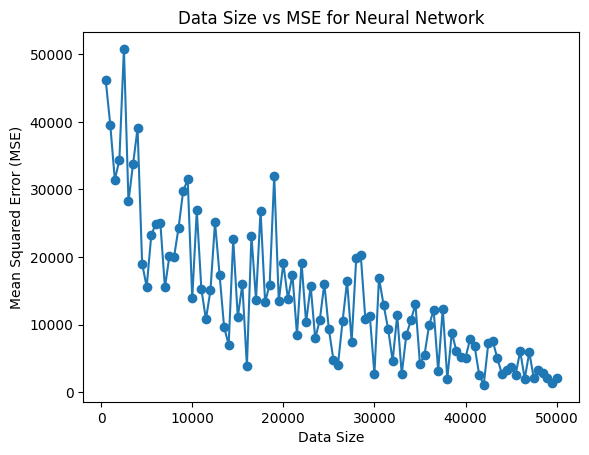

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

np.random.seed(0)

def generate_data(data_size):
    X, y = make_regression(n_samples=data_size, n_features=50, noise=0.1)
    return X, y

def train_and_evaluate(data_size):
    # Generate data
    X, y = generate_data(data_size)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the neural network model
    model = Sequential()
    model.add(Dense(units=1, input_dim=50, activation='linear'))

    # Compile the model with mean squared error (MSE) loss
    model.compile(optimizer=Adam(), loss='mse')

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model on the test set and calculate MSE
    mse_value = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    return mse_value

# Data sizes to simulate
data_sizes = np.arange(500, 50500, 500)
mse_values = []

# Run the simulation
for size in data_sizes:
    mse_value = train_and_evaluate(size)
    mse_values.append(mse_value)

# Plot the results
plt.plot(data_sizes, mse_values, marker='o')
plt.title('Data Size vs MSE for Neural Network')
plt.xlabel('Data Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()
